<a href="https://colab.research.google.com/github/ne-adrita/Predicting-Sleep-Quality-through-Behavioral-Pattern-Recognition/blob/main/MLP_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


📊 MLP Regressor Evaluation
MAE: 2.9100533616018915
MSE: 12.140274212198966
R² Score: -0.49549442740104777


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(



📊 MLP Classifier Evaluation
Accuracy: 0.327
Classification Report:
               precision    recall  f1-score   support

        Poor       0.38      0.40      0.39       394
     Average       0.31      0.33      0.32       310
        Good       0.26      0.22      0.24       296

    accuracy                           0.33      1000
   macro avg       0.32      0.32      0.32      1000
weighted avg       0.32      0.33      0.32      1000

Confusion Matrix:
 [[158 125 111]
 [131 103  76]
 [128 102  66]]


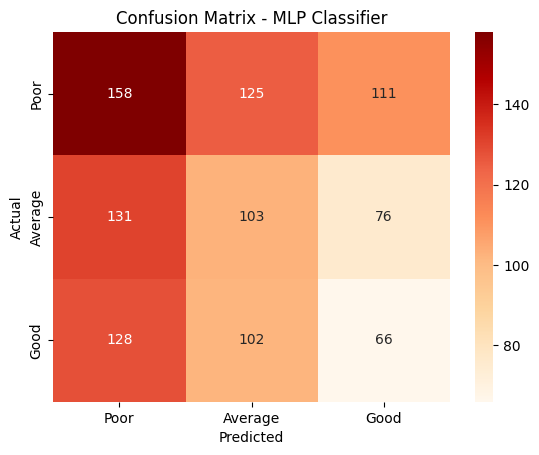

In [1]:
# 📌 Step 1: Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    mean_absolute_error, mean_squared_error, r2_score
)
import matplotlib.pyplot as plt
import seaborn as sns

# 📂 Step 2: Load dataset
df = pd.read_csv('/content/sleep_pattern_analysis_datasett.csv')

# 🧹 Step 3: Clean data
df.drop('Person_ID', axis=1, inplace=True)
df['Work Hours (hrs/day)'] = pd.to_numeric(df['Work Hours (hrs/day)'], errors='coerce')
df['Gender'] = LabelEncoder().fit_transform(df['Gender'])
df.dropna(inplace=True)

# 🎯 Step 4: Features and Targets
X = df.drop('Sleep Quality', axis=1)
y_reg = df['Sleep Quality']  # For regression
y_class = y_reg.apply(lambda x: 0 if x <= 4 else (1 if x <= 7 else 2))  # For classification

# ⚖ Step 5: Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ------------------------------
# 🧠 Step 6A: MLP Regressor
# ------------------------------
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_scaled, y_reg, test_size=0.2, random_state=42)

mlp_reg = MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42)
mlp_reg.fit(X_train_r, y_train_r)
y_pred_r = mlp_reg.predict(X_test_r)

print("📊 MLP Regressor Evaluation")
print("MAE:", mean_absolute_error(y_test_r, y_pred_r))
print("MSE:", mean_squared_error(y_test_r, y_pred_r))
print("R² Score:", r2_score(y_test_r, y_pred_r))

# ------------------------------
# 🧠 Step 6B: MLP Classifier
# ------------------------------
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_scaled, y_class, test_size=0.2, random_state=42)

mlp_clf = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42)
mlp_clf.fit(X_train_c, y_train_c)
y_pred_c = mlp_clf.predict(X_test_c)

print("\n📊 MLP Classifier Evaluation")
print("Accuracy:", accuracy_score(y_test_c, y_pred_c))
print("Classification Report:\n", classification_report(y_test_c, y_pred_c, target_names=["Poor", "Average", "Good"]))
print("Confusion Matrix:\n", confusion_matrix(y_test_c, y_pred_c))

# 🔍 Confusion Matrix Plot
cm = confusion_matrix(y_test_c, y_pred_c)
sns.heatmap(cm, annot=True, cmap='OrRd', fmt='d',
            xticklabels=["Poor", "Average", "Good"],
            yticklabels=["Poor", "Average", "Good"])
plt.title("Confusion Matrix - MLP Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
